In [3]:
import sys
sys.path.append('../lib')
sys.path.append('../transform')
sys.path.append('../indicators')
sys.path.append('../predictors')
sys.path.append('../utilities')

# Import the Time Series library
import statsmodels.tsa.stattools as ts
from retrieve_issue_data import read_issue_data
from stat_tests import *
from compute_target import *
from lag_transform import *
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
plt.style.use('seaborn-ticks')

In [14]:
    issue = "tlt"
    pivotDate = datetime.date(2018, 4, 1)
    inSampleOutOfSampleRatio = 2
    outOfSampleMonths = 2
    inSampleMonths = inSampleOutOfSampleRatio * outOfSampleMonths
    segments = 2
    months_to_load = inSampleMonths + segments * outOfSampleMonths
       
    inSampleStartDate = pivotDate - relativedelta(months=months_to_load)
    dataLoadStartDate = inSampleStartDate - relativedelta(months=1)
    print("Load Date: ", dataLoadStartDate)
    print("In Sample Start  Date: ", inSampleStartDate)
    print("Pivot Date: ", pivotDate)
    
    dataSet = read_issue_data(issue, dataLoadStartDate, pivotDate)
    print(issue)
    nrows = dataSet.shape[0]
    print ("nrows: ", nrows)
    
    # set lag on Close (Pri)
    lag_var = 'Pri'
    lags = 5
    dataSet = add_lag(dataSet, lag_var, lags)
    
    # set % return variables and lags
    dataSet["percReturn"] = dataSet["Pri"].pct_change()*100
    lag_var = 'percReturn'
    lags = 5    
    dataSet = add_lag(dataSet, lag_var, lags)    

Load Date:  2017-07-01
In Sample Start  Date:  2017-08-01
Pivot Date:  2018-04-01
Successfully retrieved Primary
tlt
nrows:  186


In [5]:
#print(dataSet.head())

             Close    High      Low    Open    Volume     Pri  Pri_lag1  \
2017-07-03  124.46  125.04  124.020  125.00  11021117  124.46       NaN   
2017-07-05  124.49  124.65  124.115  124.20  11394539  124.49    124.46   
2017-07-06  123.46  123.64  122.930  123.52  10853050  123.46    124.49   
2017-07-07  122.72  123.03  122.585  122.84   9401813  122.72    123.46   
2017-07-10  122.90  123.10  122.680  122.87   3859189  122.90    122.72   

            Pri_lag2  Pri_lag3  Pri_lag4  Pri_lag5  percReturn  \
2017-07-03       NaN       NaN       NaN       NaN         NaN   
2017-07-05       NaN       NaN       NaN       NaN    0.024104   
2017-07-06    124.46       NaN       NaN       NaN   -0.827376   
2017-07-07    124.49    124.46       NaN       NaN   -0.599384   
2017-07-10    123.46    124.49    124.46       NaN    0.146675   

            percReturn_lag1  percReturn_lag2  percReturn_lag3  \
2017-07-03              NaN              NaN              NaN   
2017-07-05            

In [15]:
    #set beLong level
    beLongThreshold = 0
    
    modelStartDate = inSampleStartDate
    print(modelStartDate)
    modelEndDate = modelStartDate + relativedelta(months=inSampleMonths)

2017-08-01


In [8]:
    for i in range(segments):
#        inSampleDataSetName = 'isDataSet' + str(i)
#        print (inSampleDataSetName)
#        outOfSampleDataSetName = 'oosDataSet' + str(i)
#        print (outOfSampleDataSetName)
        modelEndDate = modelStartDate + relativedelta(months=inSampleMonths)
        modelData = dataSet.ix[modelStartDate:modelEndDate].copy()
        #print(modelData)
        
        # set target var
        mmData = setTarget(modelData, "Long", beLongThreshold)
        nrows = mmData.shape[0]
        print ("nrows: ", nrows)
        print (mmData.shape)
        print (mmData.tail(10))
        print ("beLong counts: ")
        print (mmData['beLong'].value_counts())
        print ("out of ", nrows)
        modelStartDate = modelEndDate

nrows:  85
(85, 19)
             Close      High       Low    Open    Volume     Pri  Pri_lag1  \
2017-11-17  126.39  126.4400  125.9600  126.07   6938792  126.39    125.46   
2017-11-20  126.34  126.3800  125.9100  125.91   4232349  126.34    126.39   
2017-11-21  126.74  127.2900  126.3100  127.09   5818422  126.74    126.34   
2017-11-22  127.15  127.2048  126.5100  126.62   4140708  127.15    126.74   
2017-11-24  126.80  127.0300  126.6900  126.93   3141388  126.80    127.15   
2017-11-27  126.62  127.0500  126.4200  126.86   6079853  126.62    126.80   
2017-11-28  126.79  127.1800  126.4700  126.77   5983021  126.79    126.62   
2017-11-29  125.54  125.6800  125.1031  125.56  14547146  125.54    126.79   
2017-11-30  125.12  125.5200  124.4399  125.31   9630008  125.12    125.54   
2017-12-01  126.55  127.6900  125.1000  125.87  24583127  126.55    125.12   

            Pri_lag2  Pri_lag3  Pri_lag4  Pri_lag5  percReturn  \
2017-11-17    126.56    125.20    124.36    126.00    0

In [9]:
for i in range(segments):
#        inSampleDataSetName = 'isDataSet' + str(i)
#        print (inSampleDataSetName)
#        outOfSampleDataSetName = 'oosDataSet' + str(i)
#        print (outOfSampleDataSetName)
        modelEndDate = modelStartDate + relativedelta(months=inSampleMonths)
        modelData = dataSet.ix[modelStartDate:modelEndDate].copy()
        #print(modelData)
        
        # set target var
        mmData = setTarget(modelData, "Long", beLongThreshold)
        nrows = mmData.shape[0]
        print ("nrows: ", nrows)
        print (mmData.shape)
        print (mmData.tail(10))
        print ("beLong counts: ")
        print (mmData['beLong'].value_counts())
        print ("out of ", nrows)
        modelStartDate = modelEndDate

nrows:  0
(0, 19)
Empty DataFrame
Columns: [Close, High, Low, Open, Volume, Pri, Pri_lag1, Pri_lag2, Pri_lag3, Pri_lag4, Pri_lag5, percReturn, percReturn_lag1, percReturn_lag2, percReturn_lag3, percReturn_lag4, percReturn_lag5, gainAhead, beLong]
Index: []
beLong counts: 
Series([], Name: beLong, dtype: int64)
out of  0
nrows:  0
(0, 19)
Empty DataFrame
Columns: [Close, High, Low, Open, Volume, Pri, Pri_lag1, Pri_lag2, Pri_lag3, Pri_lag4, Pri_lag5, percReturn, percReturn_lag1, percReturn_lag2, percReturn_lag3, percReturn_lag4, percReturn_lag5, gainAhead, beLong]
Index: []
beLong counts: 
Series([], Name: beLong, dtype: int64)
out of  0


In [10]:
print(modelData)

Empty DataFrame
Columns: [Close, High, Low, Open, Volume, Pri, Pri_lag1, Pri_lag2, Pri_lag3, Pri_lag4, Pri_lag5, percReturn, percReturn_lag1, percReturn_lag2, percReturn_lag3, percReturn_lag4, percReturn_lag5, gainAhead, beLong]
Index: []


In [18]:
        modelEndDate = modelStartDate + relativedelta(months=inSampleMonths)
        modelData = dataSet.ix[modelStartDate:modelEndDate].copy()
        #print(modelData)
        
        # set target var
        mmData = setTarget(modelData, "Long", beLongThreshold)
        nrows = mmData.shape[0]
        print ("nrows: ", nrows)
        print (mmData.shape)
        print (mmData.tail(10))
        print ("beLong counts: ")
        print (mmData['beLong'].value_counts())
        print ("out of ", nrows)
        #modelStartDate = modelEndDate

nrows:  85
(85, 19)
             Close      High       Low    Open    Volume     Pri  Pri_lag1  \
2017-11-17  126.39  126.4400  125.9600  126.07   6938792  126.39    125.46   
2017-11-20  126.34  126.3800  125.9100  125.91   4232349  126.34    126.39   
2017-11-21  126.74  127.2900  126.3100  127.09   5818422  126.74    126.34   
2017-11-22  127.15  127.2048  126.5100  126.62   4140708  127.15    126.74   
2017-11-24  126.80  127.0300  126.6900  126.93   3141388  126.80    127.15   
2017-11-27  126.62  127.0500  126.4200  126.86   6079853  126.62    126.80   
2017-11-28  126.79  127.1800  126.4700  126.77   5983021  126.79    126.62   
2017-11-29  125.54  125.6800  125.1031  125.56  14547146  125.54    126.79   
2017-11-30  125.12  125.5200  124.4399  125.31   9630008  125.12    125.54   
2017-12-01  126.55  127.6900  125.1000  125.87  24583127  126.55    125.12   

            Pri_lag2  Pri_lag3  Pri_lag4  Pri_lag5  percReturn  \
2017-11-17    126.56    125.20    124.36    126.00    0

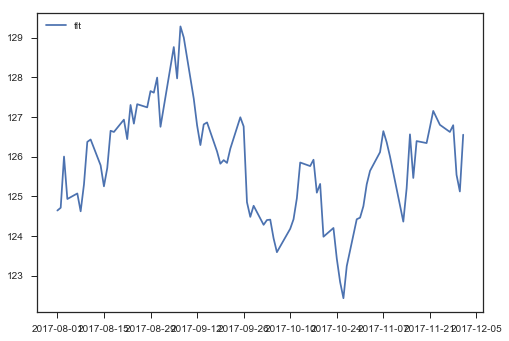

In [20]:
        mmData = mmData.drop(['Open','High','Low','Close'],axis=1)
        
        plt.style.use('seaborn-ticks')
        fig, ax = plt.subplots()
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        plt.plot(mmData['Pri'], label=issue)
        plt.legend(loc='upper left')
        print("\n\n\n")
        plt.show(block=False)

nrows beLong:  85
2017-08-01    1
2017-08-02    1
2017-08-03   -1
2017-08-04    1
2017-08-07   -1
Freq: C, Name: beLong, dtype: int32






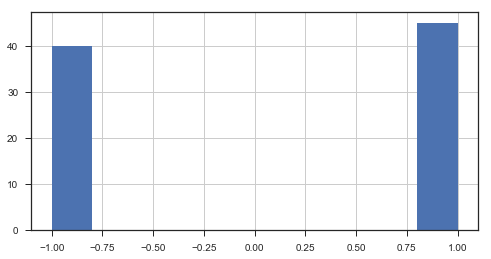

In [21]:
        mmData = mmData.drop(['Pri'],axis=1)
        
        datay = mmData['beLong']
        nrows = datay.shape[0]
        print ("nrows beLong: ", nrows)
        print(datay.head())
        plt.figure(2)
        datay.hist(figsize=(8,4  ))
        print("\n\n\n")
        plt.show(block=False)
        
        mmData = mmData.drop(['beLong'],axis=1)

In [22]:
        dataX = mmData
        
        #  Copy from pandas dataframe to numpy arrays
        dy = np.zeros_like(datay)
        dX = np.zeros_like(dataX)
        
        dy = datay.values
        dX = dataX.values
        
        ######################
        # ML section
        
        iterations = 100
        
        model = LogisticRegression()
        
        #  Make 'iterations' index vectors for the train-test split
        sss = StratifiedShuffleSplit(dy,iterations,test_size=0.33, random_state=None)

NameError: name 'StratifiedShuffleSplit' is not defined